C:\Users\zsmar\AppData\Local\Temp\ipykernel_44608\408190573.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1, x='Region', y='AMR (FPKM)', palette='muted', linewidth=2)


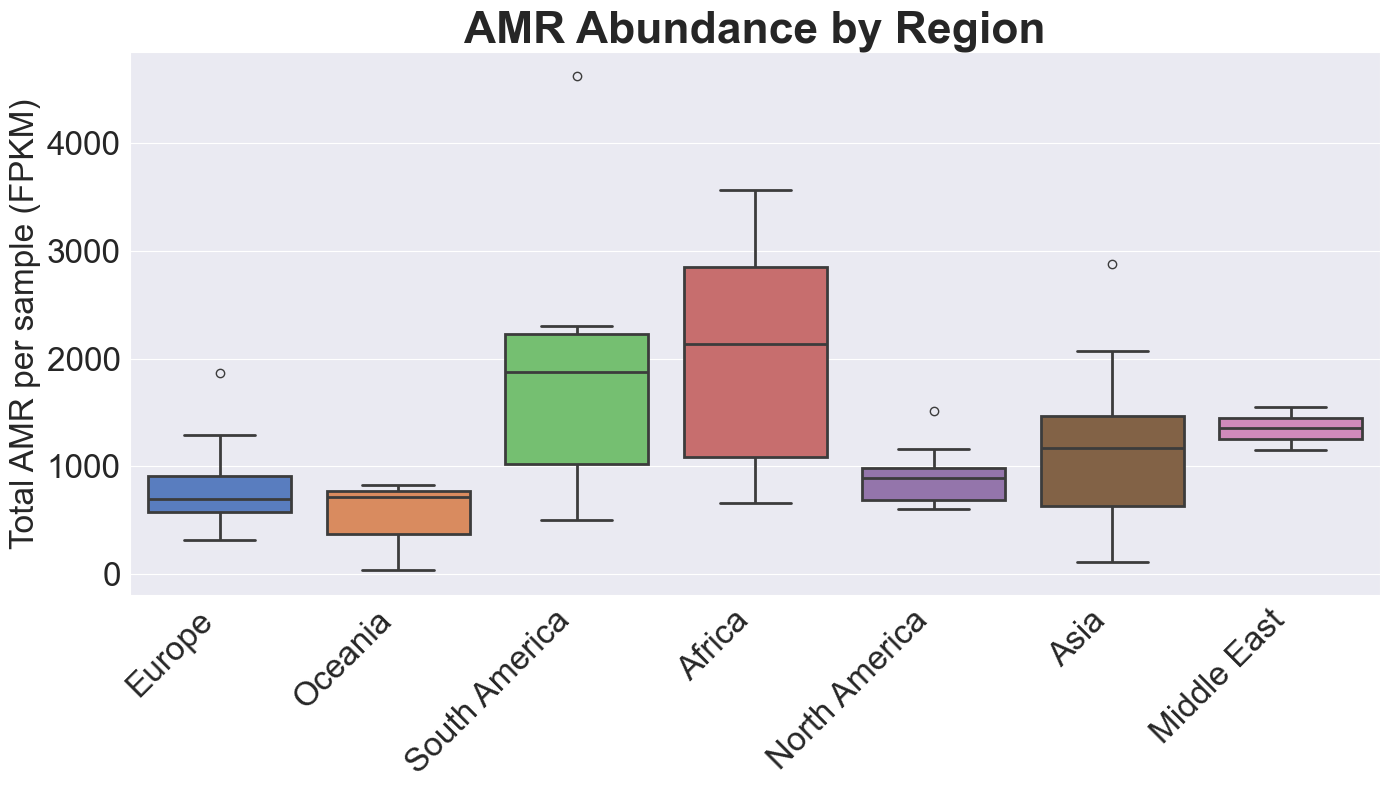

C:\Users\zsmar\AppData\Local\Temp\ipykernel_44608\408190573.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_1, x='Region', y='AMR (FPKM)', palette='muted', linewidth=2)


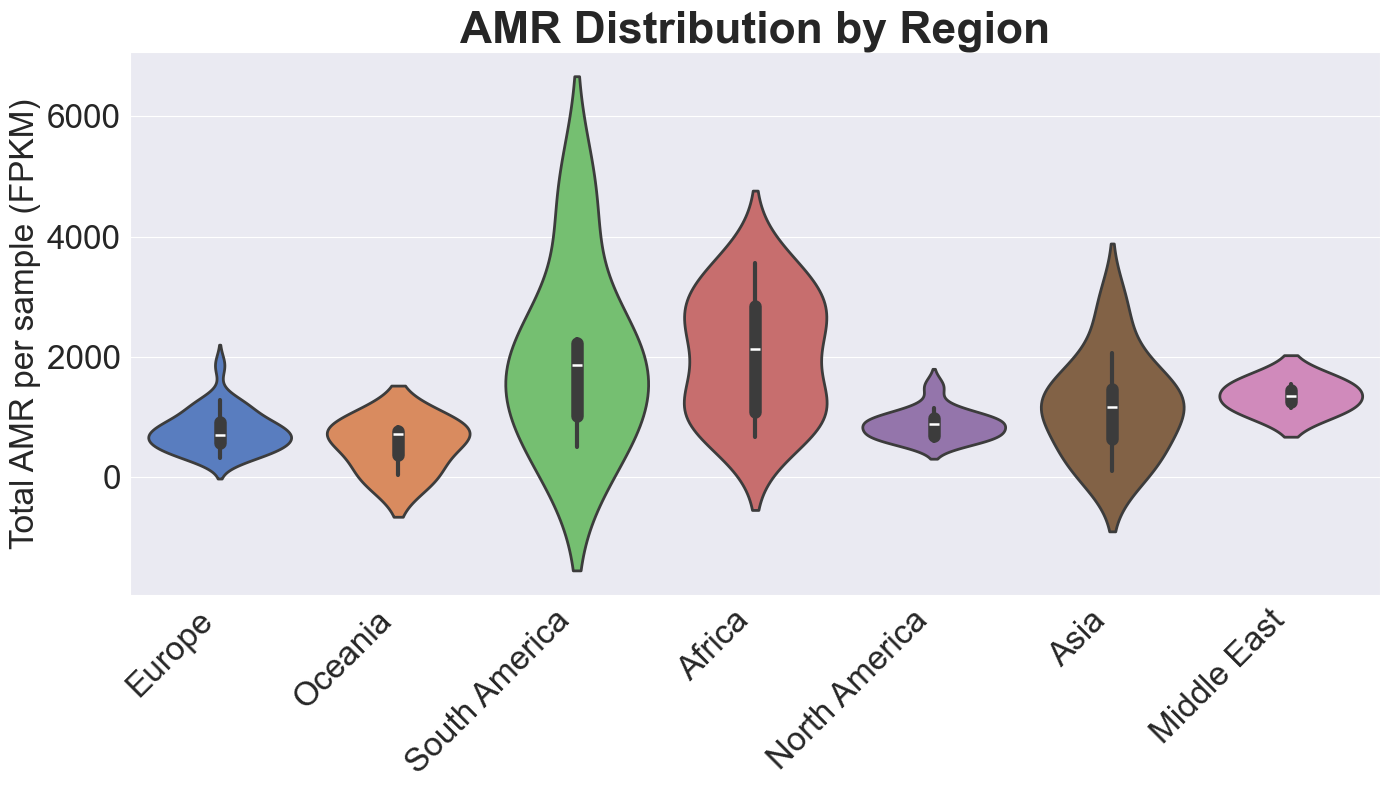

C:\Users\zsmar\AppData\Local\Temp\ipykernel_44608\408190573.py:49: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = shapiro(data)


Europe: p = 0.0271 (Not Normal)
Oceania: p = 0.2500 (Normal)
South America: p = 0.3407 (Normal)
Africa: p = 0.3771 (Normal)
North America: p = 0.0952 (Normal)
Asia: p = 0.6456 (Normal)
Middle East: p = nan (Not Normal)

Kruskal-Wallis Test Results:
H-statistic: 24.7140
P-value: 3.8569e-04


In [11]:
#Analysis 1: AMR Abundance by Region
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

#Load data
df_1 = pd.read_csv(r'C:\Users\zsmar\Dropbox\Personal\Grad School\CIE 532\Project\Data\Input\1_AMR by Region.csv')

#Calculate statistics by region
regional_stats = df_1.groupby('Region')['AMR (FPKM)'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Count', 'count')
]).round(2)

#Save results to folder
regional_stats.to_csv(r'C:\Users\zsmar\Dropbox\Personal\Grad School\CIE 532\Project\Data\Output\1_regional_amr_stats.csv')

#Create box plot
plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")
sns.boxplot(data=df_1, x='Region', y='AMR (FPKM)', palette='muted', linewidth=2)
plt.xticks(rotation=45, ha='right', fontsize=24)
plt.yticks(ha='right', fontsize=24)
plt.title('AMR Abundance by Region', fontsize=32, fontweight='bold')
plt.ylabel('Total AMR per sample (FPKM)', fontsize=24)
plt.xlabel('')
plt.tight_layout()
plt.show()

#Violin plot for better visualization
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_1, x='Region', y='AMR (FPKM)', palette='muted', linewidth=2)
plt.xticks(rotation=45, ha='right', fontsize=24)
plt.yticks(ha='right', fontsize=24)
plt.title('AMR Distribution by Region', fontsize=32, fontweight='bold')
plt.ylabel('Total AMR per sample (FPKM)', fontsize=24)
plt.xlabel('')
plt.tight_layout()
plt.show()

#Shapiro-Wilks test for normality
for region in df_1['Region'].unique():
    data = df_1[df_1['Region'] == region]['AMR (FPKM)']
    stat, p = shapiro(data)
    print(f"{region}: p = {p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")

#Kruskal-Wallis test
groups = [group['AMR (FPKM)'].values for _, group in df_1.groupby('Region')]
h_stat, p_value = stats.kruskal(*groups)
print(f"\nKruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value:.4e}")



Strong Correlations (r > 0.5): 17 found

Beta-lactam          <-> Sulfonamide           r = 0.856  ***
Sulfonamide          <-> Tetracycline          r = 0.846  ***
Chloramphenicol      <-> Tetracycline          r = 0.813  ***
Chloramphenicol      <-> Sulfonamide           r = 0.756  ***
Chloramphenicol      <-> Trimethoprim          r = 0.750  ***
Aminoglycoside       <-> Tetracycline          r = 0.689  ***
Beta-lactam          <-> Tetracycline          r = 0.678  ***
Fosfomycin           <-> Quinolone             r = 0.652  ***
Aminoglycoside       <-> Chloramphenicol       r = 0.604  ***
Beta-lactam          <-> Aminoglycoside        r = 0.589  ***
Rifamycin            <-> Quinolone             r = 0.583  ***
Trimethoprim         <-> Sulfonamide           r = 0.571  ***
Aminoglycoside       <-> Sulfonamide           r = 0.563  ***
Trimethoprim         <-> Tetracycline          r = 0.557  ***
Beta-lactam          <-> Chloramphenicol       r = 0.543  ***
Lincosamide          <-> Tet

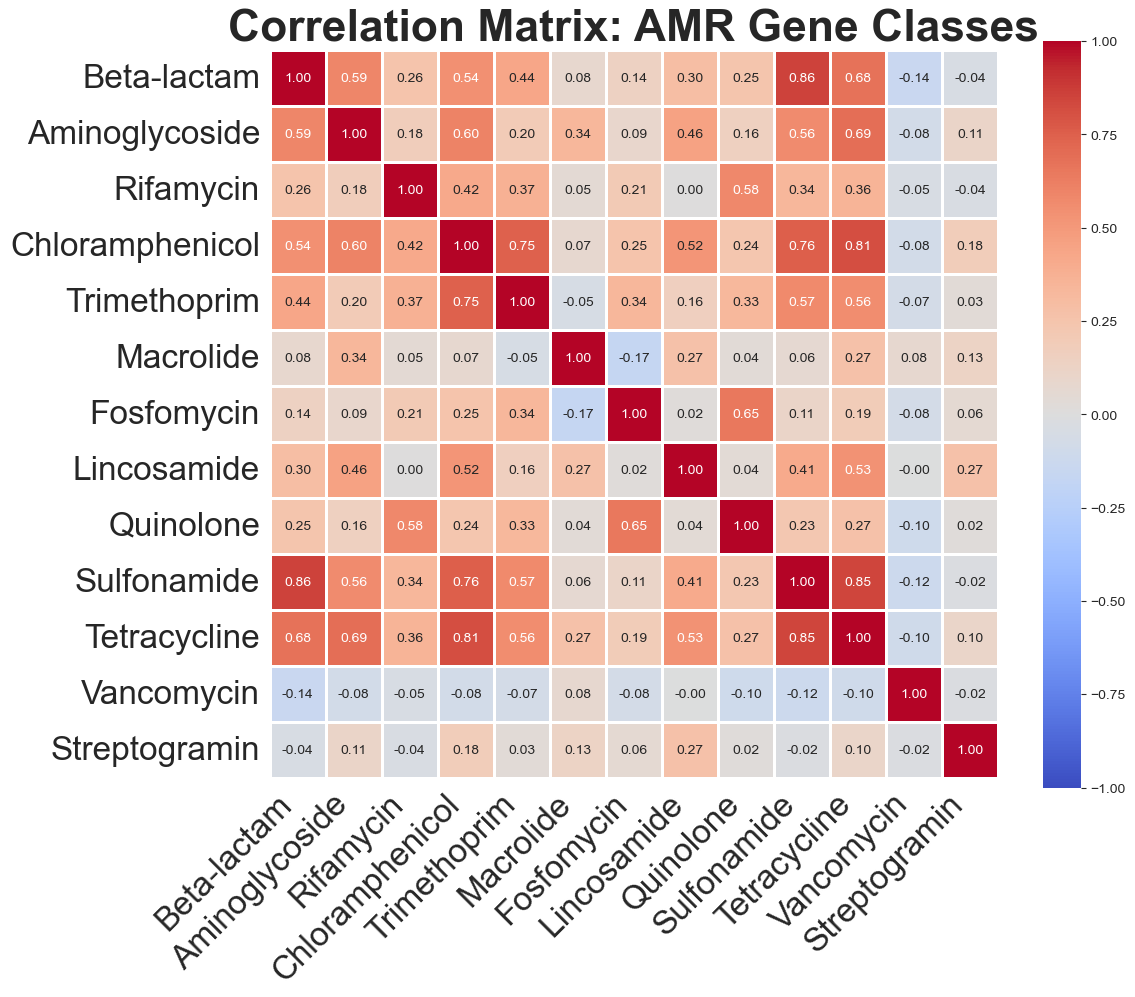

In [21]:
#Analysis 2: Correlation Between AMR Gene Classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

#Load data
df_2_raw = pd.read_csv(r'C:\Users\zsmar\Dropbox\Personal\Grad School\CIE 532\Project\Data\Input\2_GS.ResFind.Gene.FPKM.csv')

#Skip first 3 rows with headers
df_2 = df_2_raw.iloc[3:].copy()

#Set the gene names as the row index
df_2.set_index('Site', inplace=True)

#Convert all values to numbers
df_2 = df_2.apply(pd.to_numeric, errors='coerce')

# Function to classify genes into resistance classes - AI assisted
def classify_gene(gene_name):
    gene = str(gene_name).lower()
    
    if gene.startswith('bla') or gene.startswith('amp'):
        return 'Beta-lactam'
    elif any(gene.startswith(p) for p in ['ant(', 'aph(', 'aac(']):
        return 'Aminoglycoside'
    elif gene.startswith('tet'):
        return 'Tetracycline'
    elif any(gene.startswith(p) for p in ['erm', 'msr', 'mef']):
        return 'Macrolide'
    elif gene.startswith('qnr') or gene.startswith('gyr'):
        return 'Quinolone'
    elif gene.startswith('sul'):
        return 'Sulfonamide'
    elif gene.startswith('dfr'):
        return 'Trimethoprim'
    elif gene.startswith('van'):
        return 'Vancomycin'
    elif gene.startswith('cat') or gene.startswith('cml'):
        return 'Chloramphenicol'
    elif gene.startswith('fos'):
        return 'Fosfomycin'
    elif gene.startswith('arr'):
        return 'Rifamycin'
    elif gene.startswith('lnu') or gene.startswith('lsa'):
        return 'Lincosamide'
    elif gene.startswith('vga') or gene.startswith('vgb'):
        return 'Streptogramin'
    else:
        return 'Other'

# Aggregate genes by class - AI assisted
class_data = {}
for gene in df_2.index:
    gene_class = classify_gene(gene)
    if gene_class not in class_data:
        class_data[gene_class] = df_2.loc[gene].values
    else:
        class_data[gene_class] += df_2.loc[gene].values

#Create dataframe with classes as columns
df_class = pd.DataFrame(class_data, index=df_2.columns)

#Remove Other category
if 'Other' in df_class.columns:
    df_class = df_class.drop('Other', axis=1)

#Calculate correlation matrix
correlation_matrix = df_class.corr()

#Save correlation matrix to folder
correlation_matrix.to_csv(r'C:\Users\zsmar\Dropbox\Personal\Grad School\CIE 532\Project\Data\Output\2_correlation_matrix.csv')

# Find strong correlations - AI assisted
indices = np.where((np.abs(correlation_matrix) > 0.5) & (np.triu(np.ones_like(correlation_matrix), k=1).astype(bool)))
strong_corr = []
for i, j in zip(*indices):
    class1 = correlation_matrix.index[i]
    class2 = correlation_matrix.columns[j]
    r = correlation_matrix.iloc[i, j]
    _, p_val = pearsonr(df_class[class1], df_class[class2])
    strong_corr.append((class1, class2, r, p_val))

strong_corr.sort(key=lambda x: abs(x[2]), reverse=True)
print(f"\nStrong Correlations (r > 0.5): {len(strong_corr)} found\n")
for class1, class2, r, p_val in strong_corr:
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*"
    print(f"{class1:20s} <-> {class2:20s}  r = {r:.3f}  {sig}")

#Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, vmin=-1, vmax=1,
            square=True, linewidths=1)
plt.title('Correlation Matrix: AMR Gene Classes', fontsize=32, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=24)
plt.yticks(rotation=0, fontsize=24)
plt.tight_layout()
plt.show()


Correlations with AMR:
Life_Expectancy       r =  -0.661  R² = 0.437  ***
GDP_per_capita        r =  -0.479  R² = 0.229  ***
Sanitation            r =  -0.545  R² = 0.297  ***
Health_Expenditure    r =  -0.475  R² = 0.226  ***


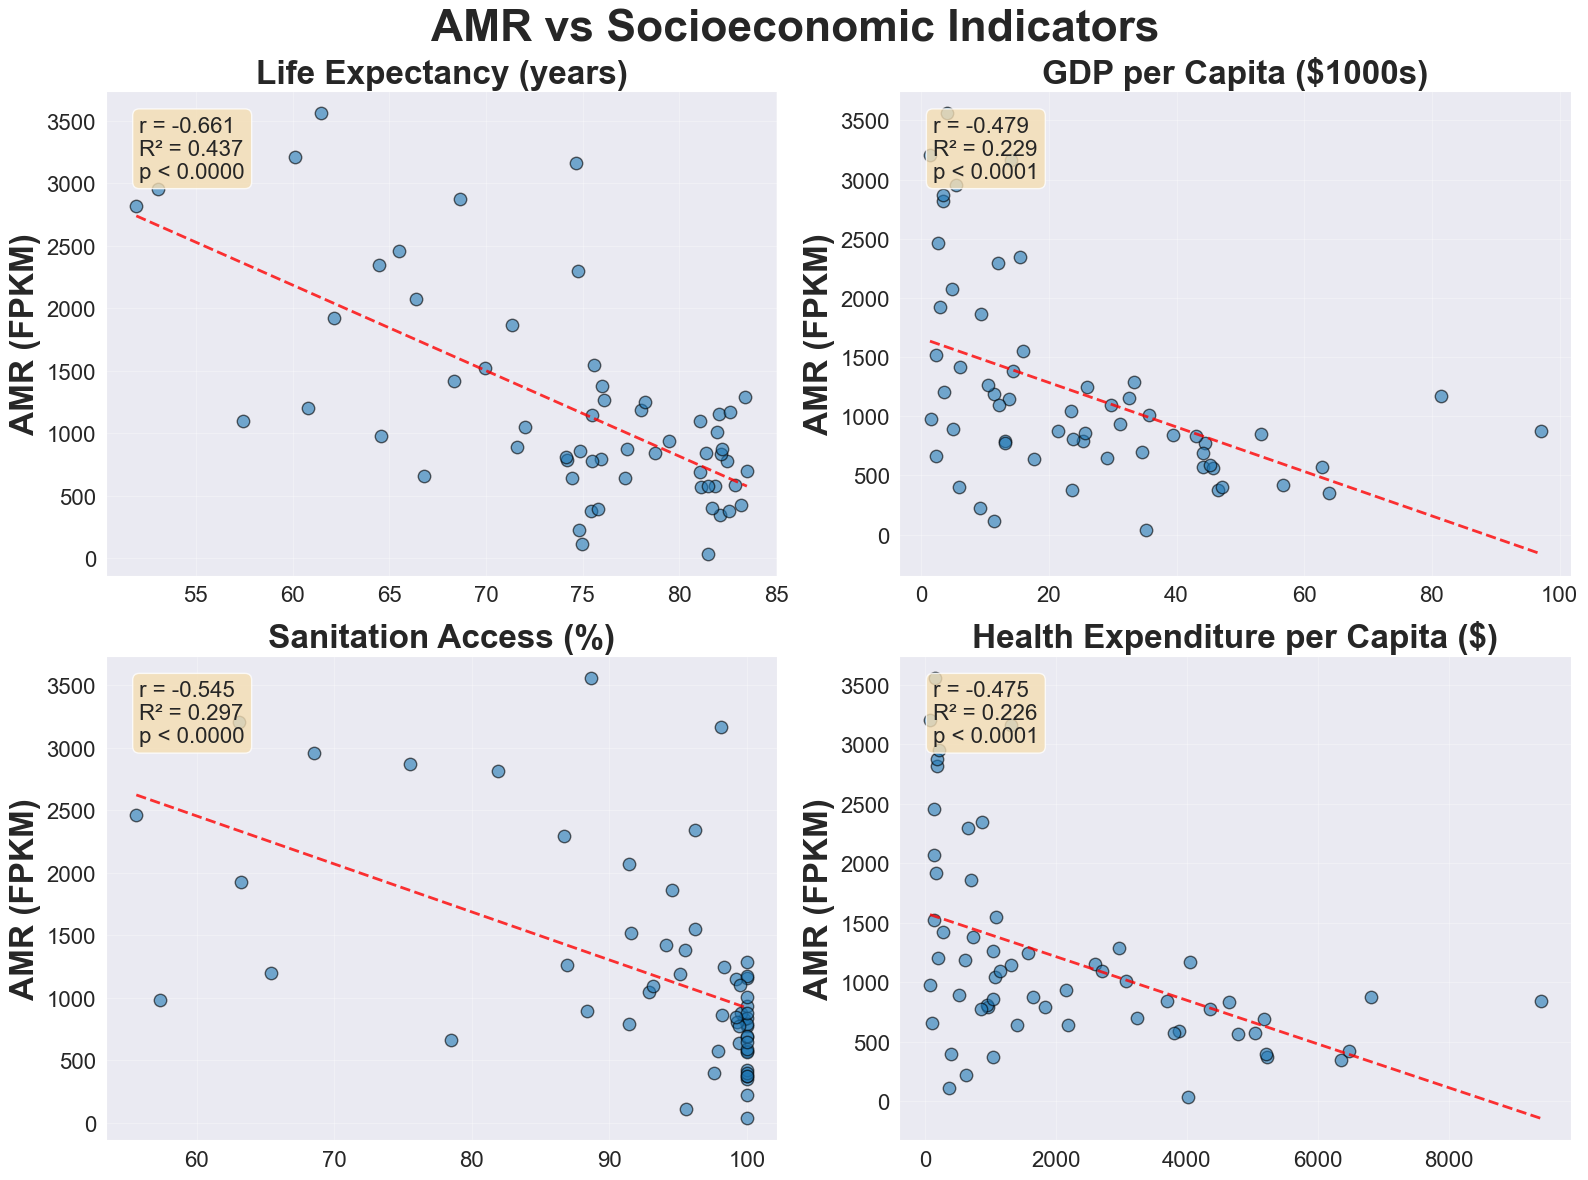

In [10]:
#Analysis 3: AMR vs Socioeconomic Variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress

#Load AMR data
df_3 = pd.read_csv(r'C:\Users\zsmar\Dropbox\Personal\Grad School\CIE 532\Project\Data\Input\1_AMR by Region.csv')

#Calculate mean by country
amr_by_country = df_3.groupby('Country').agg({
    'AMR (FPKM)': 'mean',
    'Region': 'first'
}).reset_index()

#Load World Bank data
df_wb = pd.read_csv(r'C:\Users\zsmar\Dropbox\Personal\Grad School\CIE 532\Project\Data\Input\3_World Bank Data.csv')

# Country name to ISO3 code mapping - AI assisted
country_codes = {
    'Albania': 'ALB', 'Australia': 'AUS', 'Austria': 'AUT', 'Bulgaria': 'BGR',
    'Brasil': 'BRA', 'Botswana': 'BWA', 'Canada': 'CAN', 'Switzerland': 'CHE',
    'China': 'CHN', 'COTE DIVOIRE': 'CIV', 'Colombia': 'COL', 'Czech Republic': 'CZE',
    'Germany': 'DEU', 'Denmark': 'DNK', 'Ecuador': 'ECU', 'Spain': 'ESP',
    'Ethiopia': 'ETH', 'Finland': 'FIN', 'Georgia': 'GEO', 'Ghana': 'GHA',
    'Croatia': 'HRV', 'Hungary': 'HUN', 'India': 'IND', 'Ireland': 'IRL',
    'Iran': 'IRN', 'Iceland': 'ISL', 'Israel': 'ISR', 'Italy': 'ITA',
    'Kazakhstan': 'KAZ', 'Kenya': 'KEN', 'Cambodia': 'KHM', 'Sri Lanka': 'LKA',
    'Luxembourg': 'LUX', 'Latvia': 'LVA', 'Republic of Moldova': 'MDA',
    'Republic of Macedonia': 'MKD', 'Malta': 'MLT', 'Malaysia': 'MYS',
    'Nigeria': 'NGA', 'The Netherlands': 'NLD', 'Norway': 'NOR', 'Nepal': 'NPL',
    'New Zealand': 'NZL', 'Pakistan': 'PAK', 'Peru': 'PER', 'Poland': 'POL',
    'Senegal': 'SEN', 'Singapore': 'SGP', 'Serbia': 'SRB', 'Slovak Republic': 'SVK',
    'Slovenia': 'SVN', 'Sweden': 'SWE', 'Togo': 'TGO', 'Turkey': 'TUR',
    'Tanzania': 'TZA', 'USA': 'USA', 'Vietnam': 'VNM', 'Kosovo': 'XKX',
    'South Africa': 'ZAF', 'Zambia': 'ZMB'
}

amr_by_country['Country_Code'] = amr_by_country['Country'].map(country_codes)

#Select variables
wb_subset = df_wb[['Country', 'SP.DYN.LE00.IN', 'NY.GDP.PCAP.PP.KD', 
                    'SH.H2O.SAFE.ZS', 'SH.XPD.PCAP.PP.KD']].copy()

#Rename variables from codes
wb_subset.columns = ['Country', 'Life_Expectancy', 'GDP_per_capita', 
                     'Sanitation', 'Health_Expenditure']

#Convert GDP to thousands
wb_subset['GDP_per_capita'] = wb_subset['GDP_per_capita'] / 1000

#Merge AMR and World Bank data
merged = amr_by_country.merge(wb_subset, left_on='Country_Code', 
                               right_on='Country', suffixes=('', '_wb'))
merged = merged.dropna(subset=['Life_Expectancy', 'GDP_per_capita', 'Sanitation', 'Health_Expenditure'])

#Save merged data to folder
merged.to_csv(r'C:\Users\zsmar\Dropbox\Personal\Grad School\CIE 532\Project\Data\Output\3_amr_wb_merged.csv')

#Variables to analyze
variables = ['Life_Expectancy', 'GDP_per_capita', 'Sanitation', 'Health_Expenditure']

#Labels for plots
labels = {
    'Life_Expectancy': 'Life Expectancy (years)',
    'GDP_per_capita': 'GDP per Capita ($1000s)',
    'Sanitation': 'Sanitation Access (%)',
    'Health_Expenditure': 'Health Expenditure per Capita ($)'
}

#Calculate and print correlations
print("\nCorrelations with AMR:")
for var in variables:
    r, p_val = pearsonr(merged[var], merged['AMR (FPKM)'])
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*"
    print(f"{var:20s}  r = {r:>7.3f}  R² = {r**2:.3f}  {sig}")

#Create 2x2 scatter plot panel
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, var in enumerate(variables):
    ax = axes[idx]
    x = merged[var]
    y = merged['AMR (FPKM)']
    
    #Scatter plot
    ax.scatter(x, y, s=80, alpha=0.6, edgecolors='black', linewidth=1)

    #Add regression line
    slope = 'a'
    intercept = 'b'
    a, b, r, p_val, std_err = linregress(x, y)
    x_line = np.linspace(x.min(), x.max(), 100)
    ax.plot(x_line, a * x_line + b, "r--", linewidth=2, alpha=0.8)
    
    #Add statistics text box
    r, p_val = pearsonr(x, y)
    textstr = f'r = {r:.3f}\nR² = {r**2:.3f}\np < {p_val:.4f}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=16,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    #Labels
    ax.set_ylabel('AMR (FPKM)', fontsize=24, fontweight='bold')
    ax.set_title(labels[var], fontsize=24, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', labelsize=16)
    
plt.suptitle('AMR vs Socioeconomic Indicators', fontsize=32, fontweight='bold')
plt.tight_layout()
plt.show()